In [16]:
import bagpipes as pipes
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scienceplots as scipl
import math
import os
import scipy
from scipy import integrate
import mpld3
import streamlit as st
import streamlit.components.v1 as components

exp = {}                                # Tau model star formation history component 
exp["age"] = 3                          # Gyr 
exp["tau"] = 0.25                       # Gyr -- tau provides exponential decay ∙•●✴︎◦°∙ FOR SINGLE STARBURST MAKE TAU SMALLER (0.25)
exp["massformed"] = 10.                 # log_10(M*/M_solar) -- galaxy 10e9 > Sun
exp["metallicity"] = 1                  # Z/Z_oldsolar -- 0.5met_solar

dust = {}                               # Dust component
dust["type"] = "Calzetti"               # Define the shape of the attenuation curve
dust["Av"] = 0                          # magnitudes

burst = {}                              # Delta function burst
burst["age"] = 0.5                      # Time since burst: Gyr
burst["massformed"] = 8.6 
burst["metallicity"] = 1

model_components = {}                   # The model components dictionary
model_components["redshift"] = 0.35     # Observed redshift  
model_components["burst"] = burst
model_components["dust"] = dust

In [17]:
hst_filter_list = np.loadtxt('filters.txt', dtype='str')
jwst_filter_list = np.loadtxt('filters.txt', dtype='str')

In [18]:
model = pipes.model_galaxy(model_components, filt_list=jwst_filter_list, spec_wavs=np.arange(0, 51000, 10))

/Users/neelsharma/anaconda3/envs/bagpipes/lib/python3.10/site-packages/bagpipes/models/star_formation_history.py:131: RuntimeWarning: divide by zero encountered in log10
  self.ssfr = np.log10(self.sfr) - self.stellar_mass
/Users/neelsharma/anaconda3/envs/bagpipes/lib/python3.10/site-packages/bagpipes/models/star_formation_history.py:132: RuntimeWarning: divide by zero encountered in log10
  self.nsfr = np.log10(self.sfr*self.age_of_universe) - self.formed_mass



Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



In [19]:
import sys
 
 
def findClosest(arr, n, target):
    left, right = 0, n - 1
    while left < right:
        if abs(arr[left] - target) <= abs(arr[right] - target):
            right -= 1
        else:
            left += 1
    return arr[left]

F𝝀:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.94597991e-34
 4.44576614e-34 3.93304702e-34]
F𝜈:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

2024-07-09 00:48:44.276 
  command:

    streamlit run /Users/neelsharma/anaconda3/envs/bagpipes/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


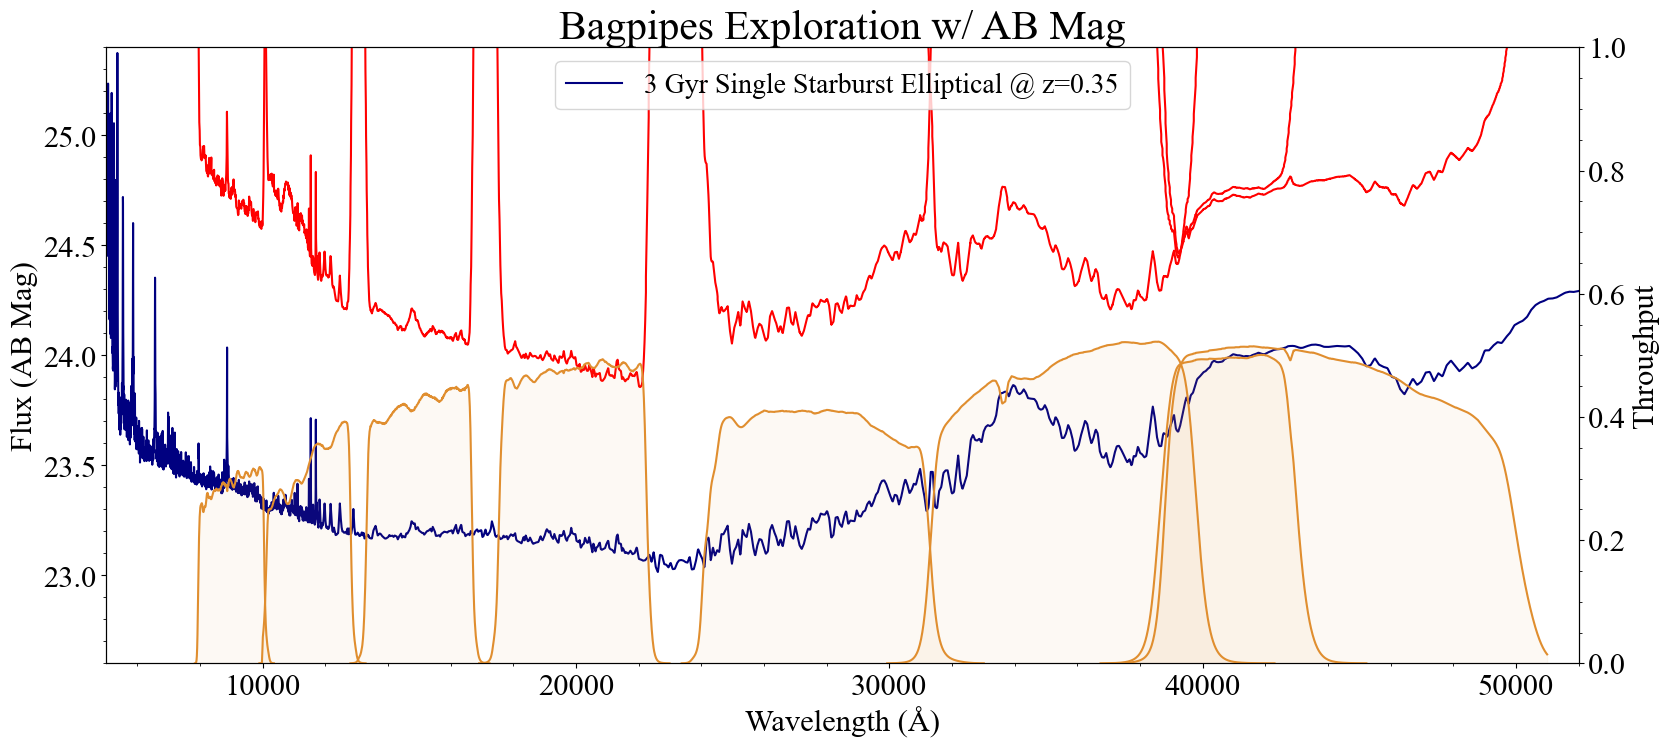

In [21]:
from scipy import integrate

#fig, ax = model.plot(show = False)
#print(ax)
#ax[0].set_xlabel('lambda / A')
#ax[0].set_xlim(4000, 49000)

x = model.wavelengths * (1 + model_components['redshift'])
y = model.spectrum_full #the graph gives 10^-18.0 erg s^-1 cm^-2 A^-1

print('F𝝀:') #10^-18.0 erg s^-1 cm^-2 A^-1
print(y)

#fig, ax = plt.subplots(figsize=(19,8))
#plt.plot(x, y, label='Plot', drawstyle='default', color='navy')
#plt.xscale('linear')
#plt.yscale('linear')
#ax.minorticks_on()
#ax.set_xlabel('Wavelength (Å)', fontsize=22)
#ax.set_ylabel('F lambda (10^-18.0 erg s^-1 cm^-2 A^-1)')
#ax.set_ylim(0, np.max(y))
#ax.set_xlim(5000, 45000)

ab_mag = []
f_nu = []

for n in range(0, len(y), 1):
    conversion = (((x[n])**2)/(3e18)) * y[n]
    f_nu.append(conversion)

print('F𝜈:') #10^-29.0 erg s^-1 cm^-2 Hz^-1
print(f_nu)

#fig, ax = plt.subplots(figsize=(19,8))
#plt.plot(x, f_nu, label='Plot', drawstyle='default', color='red')
#plt.xscale('linear')
#plt.yscale('linear')
#ax.minorticks_on()
#ax.set_xlabel('Wavelength (Å)', fontsize=22)
#ax.set_ylabel('F nu (10^-29.0 erg s^-1 cm^-2 Hz^-1)')
#ax.set_ylim(0, np.max(f_nu))
#ax.set_xlim(5000, 45000)

for n in range(0, len(f_nu), 1):
    if float(f_nu[n]) != 0:
        AB = (-2.5 * np.log10(float(f_nu[n]))) - 48.6
        ab_mag.append(float(AB))
    else:
        ab_mag.append(0)

print('\nWavelength')
print(x)

print('AB Mag:') #Mag
print(ab_mag)

# CONTINUUM SPECTRA PLOTTING

fig, ax = plt.subplots(figsize=(19,8))

wavs = x
flux = ab_mag

plt.xscale('linear')
plt.yscale('linear')

Con, = ax.plot(wavs, flux, drawstyle='default', color='navy', label=str(exp["age"]) + ' Gyr Single Starburst Elliptical @ z=' + str(model_components["redshift"]))

ax.set_xlabel('Wavelength (Å)', fontsize=22)
ax.set_ylabel('Flux (AB Mag)', fontsize=22)

ax.set_ylim(22.6, 25.4) #(22.6, 25.4)
ax.set_xlim(5000, 52000)


ax.legend(handles=[Con], loc='upper center', prop={'family': 'Times New Roman', 'size': '20'})

# FILTER PLOTTING

filters = '''   JWST_NIRCam.F090W.dat
                JWST_NIRCam.F115W.dat
                JWST_NIRCam.F150W.dat
                JWST_NIRCam.F200W.dat
                JWST_NIRCam.F277W.dat
                JWST_NIRCam.F356W.dat
                JWST_NIRCam.F444W.dat
                JWST_NIRCam.F410M.dat
'''

ax2 = ax.twinx()

for filename in os.listdir('filters/'):
    if filename in filters:
        file = open('filters/'+filename, 'r')

        wavsrange = []
        through = []

        for line in file:
            pair = line.strip().split(' ')
            wavsrange.append(float(pair[0]))
            through.append(float(pair[1]))
        
        ax2.plot(wavsrange, through, color='#E08E2F')
        ax2.fill_between(wavsrange, through, color='#E08E2F', alpha=0.05)

        # SYNTHETIC ASTRO COLOUR

        colour = []
        colourrange = []

        for n in range(0, len(wavsrange), 1):

            closestwav = findClosest(wavs, len(wavs), wavsrange[n]) # closest value in wavs to wavsrange[n] is closestwav
            wavs_lis = wavs.tolist()

            mag = through[n] * f_nu[wavs_lis.index(closestwav)]
            plotted_mag = (-2.5 * np.log10(mag)) - 48.6

            colourrange.append(closestwav)
            colour.append(plotted_mag)

        ax.plot(colourrange, colour, color='red')

ax2.set_ylabel('Throughput', fontsize=22)

ax2.set_ylim(0, 1)
ax2.set_xlim(5000,52000)

# TICK ADJUSTMENTS

ax.minorticks_on()
ax.tick_params(labelsize=22)
ax2.minorticks_on()
ax2.tick_params(labelsize=22)
plt.rcParams.update({'font.serif': "Times New Roman",
                     'font.family': "serif"                  
                    })

plt.title('Bagpipes Exploration w/ AB Mag', fontsize=30)
fig_html = mpld3.fig_to_html(fig)
components.html(fig_html, height=600)
plt.show()

# Arc 2 spectra -- try this and compare to Nick

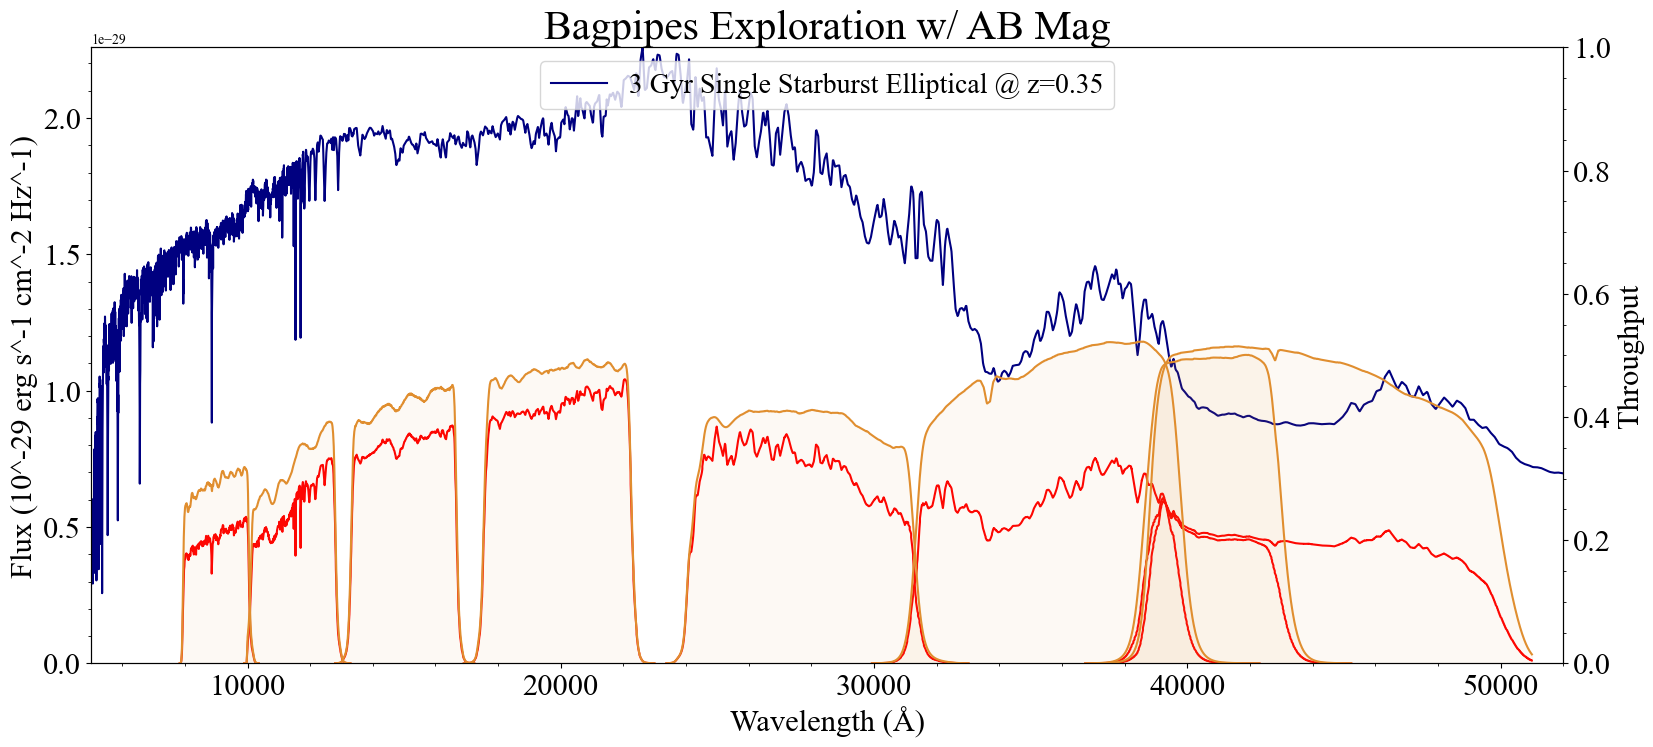

In [9]:
fig, ax = plt.subplots(figsize=(19,8))

wavs = x
flux = f_nu

plt.xscale('linear')
plt.yscale('linear')

Con, = ax.plot(wavs, flux, drawstyle='default', color='navy', label=str(exp["age"]) + ' Gyr Single Starburst Elliptical @ z=' + str(model_components["redshift"]))

ax.set_xlabel('Wavelength (Å)', fontsize=22)
ax.set_ylabel('Flux (10^-29 erg s^-1 cm^-2 Hz^-1)', fontsize=22)

ax.set_ylim(0, np.max(f_nu)) #(22.6, 25.4)
ax.set_xlim(5000, 52000)


ax.legend(handles=[Con], loc='upper center', prop={'family': 'Times New Roman', 'size': '20'})

# FILTER PLOTTING

filters = '''   JWST_NIRCam.F090W.dat
                JWST_NIRCam.F115W.dat
                JWST_NIRCam.F150W.dat
                JWST_NIRCam.F200W.dat
                JWST_NIRCam.F277W.dat
                JWST_NIRCam.F356W.dat
                JWST_NIRCam.F444W.dat
                JWST_NIRCam.F410M.dat
'''

ax2 = ax.twinx()

for filename in os.listdir('filters/'):
    if filename in filters:
        file = open('filters/'+filename, 'r')

        wavsrange = []
        through = []

        for line in file:
            pair = line.strip().split(' ')
            wavsrange.append(float(pair[0]))
            through.append(float(pair[1]))
        
        ax2.plot(wavsrange, through, color='#E08E2F')
        ax2.fill_between(wavsrange, through, color='#E08E2F', alpha=0.05)

        # SYNTHETIC ASTRO COLOUR

        colour = []
        colourrange = []

        for n in range(0, len(wavsrange), 1):

            closestwav = findClosest(wavs, len(wavs), wavsrange[n]) # closest value in wavs to wavsrange[n] is closestwav
            wavs_lis = wavs.tolist()

            mag = through[n] * f_nu[wavs_lis.index(closestwav)]

            colourrange.append(closestwav)
            colour.append(mag)

        ax.plot(colourrange, colour, color='red')

ax2.set_ylabel('Throughput', fontsize=22)

ax2.set_ylim(0, 1)
ax2.set_xlim(5000,52000)

# TICK ADJUSTMENTS

ax.minorticks_on()
ax.tick_params(labelsize=22)
ax2.minorticks_on()
ax2.tick_params(labelsize=22)
plt.rcParams.update({'font.serif': "Times New Roman",
                     'font.family': "serif"                  
                    })

plt.title('Bagpipes Exploration w/ AB Mag', fontsize=30)
plt.ion()
plt.show()

F𝝀:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.94597991e-34
 4.44576614e-34 3.93304702e-34]
F𝜈:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

/Users/neelsharma/anaconda3/envs/bagpipes/lib/python3.10/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


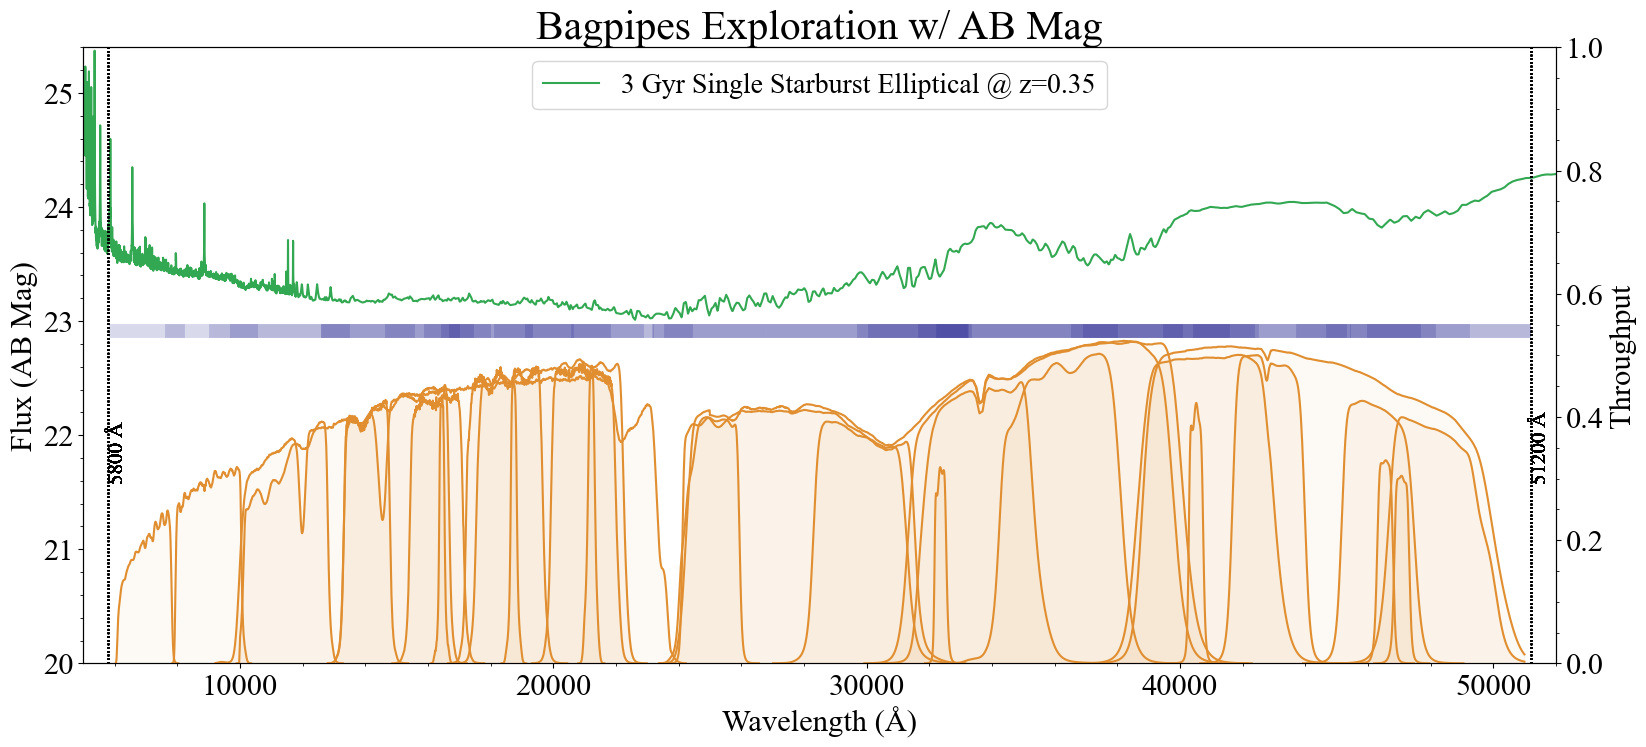

In [22]:
# Numerator = integrate(fnu*T(nu)/nu over dnu)
# Denominator = integrate(T(nu)/nu over dnu)
# mag = -2.5*log10(numerator/denominator)-48.6

#fig, ax = model.plot(show = False)
#print(ax)
#ax[0].set_xlabel('lambda / A')
#ax[0].set_xlim(4000, 49000)

x = model.wavelengths * (1 + model_components['redshift'])
y = model.spectrum_full #the graph gives 10^-18.0 erg s^-1 cm^-2 A^-1

print('F𝝀:') #10^-18.0 erg s^-1 cm^-2 A^-1
print(y)

#fig, ax = plt.subplots(figsize=(19,8))
#plt.plot(x, y, label='Plot', drawstyle='default', color='navy')
#plt.xscale('linear')
#plt.yscale('linear')
#ax.minorticks_on()
#ax.set_xlabel('Wavelength (Å)', fontsize=22)
#ax.set_ylabel('F lambda (10^-18.0 erg s^-1 cm^-2 A^-1)')
#ax.set_ylim(0, np.max(y))
#ax.set_xlim(5000, 45000)

ab_mag = []
f_nu = []

for n in range(0, len(y), 1):
    conversion = (((x[n])**2)/(2.99e18)) * y[n]
    f_nu.append(conversion)

print('F𝜈:') #10^-29.0 erg s^-1 cm^-2 Hz^-1
print(f_nu)

#fig, ax = plt.subplots(figsize=(19,8))
#plt.plot(x, f_nu, label='Plot', drawstyle='default', color='red')
#plt.xscale('linear')
#plt.yscale('linear')
#ax.minorticks_on()
#ax.set_xlabel('Wavelength (Å)', fontsize=22)
#ax.set_ylabel('F nu (10^-29.0 erg s^-1 cm^-2 Hz^-1)')
#ax.set_ylim(0, np.max(f_nu))
#ax.set_xlim(5000, 45000)

for n in range(0, len(f_nu), 1):
    if float(f_nu[n]) != 0:
        AB = (-2.5 * np.log10(float(f_nu[n]))) - 48.6
        ab_mag.append(float(AB))
    else:
        ab_mag.append(0)

print('Wavelength')
print(x)

print('AB Mag:') #Mag
print(ab_mag)

# CONTINUUM SPECTRA PLOTTING

fig, ax = plt.subplots(figsize=(19,8))

wavs = x
flux = ab_mag

plt.xscale('linear')
plt.yscale('linear')

Con, = ax.plot(wavs, flux, drawstyle='default', color='#32A852', label=str(exp["age"]) + ' Gyr Single Starburst Elliptical @ z=' + str(model_components["redshift"]))

ax.set_xlabel('Wavelength (Å)', fontsize=22)
ax.set_ylabel('Flux (AB Mag)', fontsize=22)

ax.set_ylim(20, 25.4)
ax.set_xlim(5000, 52000)

# FILTER PLOTTING

ax2 = ax.twinx()

for filename in os.listdir('filters/'):
    if 'JWST' in filename:
        file = open('filters/'+filename, 'r')

        wavsrange = []
        through = []

        for line in file:
            pair = line.strip().split(' ')
            wavsrange.append(float(pair[0]))
            through.append(float(pair[1]))
        
        ax2.plot([wavsrange[0], wavsrange[-1]], [0.54, 0.54], color='navy', alpha=0.15, lw=10)
        ax2.axvline(x=5800, color='black', lw=1, ls=':')
        ax2.annotate('5800 Å', (5800,.3), color='black', rotation=90, size=15, clip_on=True)
        ax2.axvline(x=51200, color='black', lw=1, ls=':')
        ax2.annotate('51200 Å', (51200,.3), color='black', rotation=90, size=15, clip_on=True)

        ax2.plot(wavsrange, through, color='#E08E2F')
        ax2.fill_between(wavsrange, through, color='#E08E2F', alpha=0.05)

ax2.set_ylabel('Throughput', fontsize=22)

ax2.set_ylim(0, 1)
ax2.set_xlim(5000,52000)

# TICK ADJUSTMENTS

ax.minorticks_on()
ax.tick_params(labelsize=22)
ax2.minorticks_on()
ax2.tick_params(labelsize=22)
plt.rcParams.update({'font.serif': "Times New Roman",
                     'font.family': "serif"                  
                    })

# LEGEND

ax.legend(handles=[Con], loc='upper center', prop={'family': 'Times New Roman', 'size': '20'})

plt.title('Bagpipes Exploration w/ AB Mag', fontsize=30)
fig_html = mpld3.fig_to_html(fig)
components.html(fig_html, height=600)
plt.show()

#m = -2.5*np.log10(Fnu) - 48.6
#[Y ABnu] = -2.5 * log([X ergs/cm^2/s/A]) - 2.402 - 5.0 * log(lambda A) <-- TRY THISS!!!!

#Balmer 4000 A Break -- elliptical old galaxy feature!

#NIRCam Filter curves
#Explore layering with JWST Filters -- summing up from one point other (value is synthetic astronomy (subtract one from other you get colour))
#Convert to AB Mag first before this


#F090
#F115W
#F150W
#F200W
#F277W
#F336W
#F444W

/var/folders/qy/trts8c7d3dg4b7k01x7trmlw0000gn/T/ipykernel_17834/476337039.py:53: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(np.min(model), np.max(model))


TypeError: '>' not supported between instances of 'model_galaxy' and 'model_galaxy'

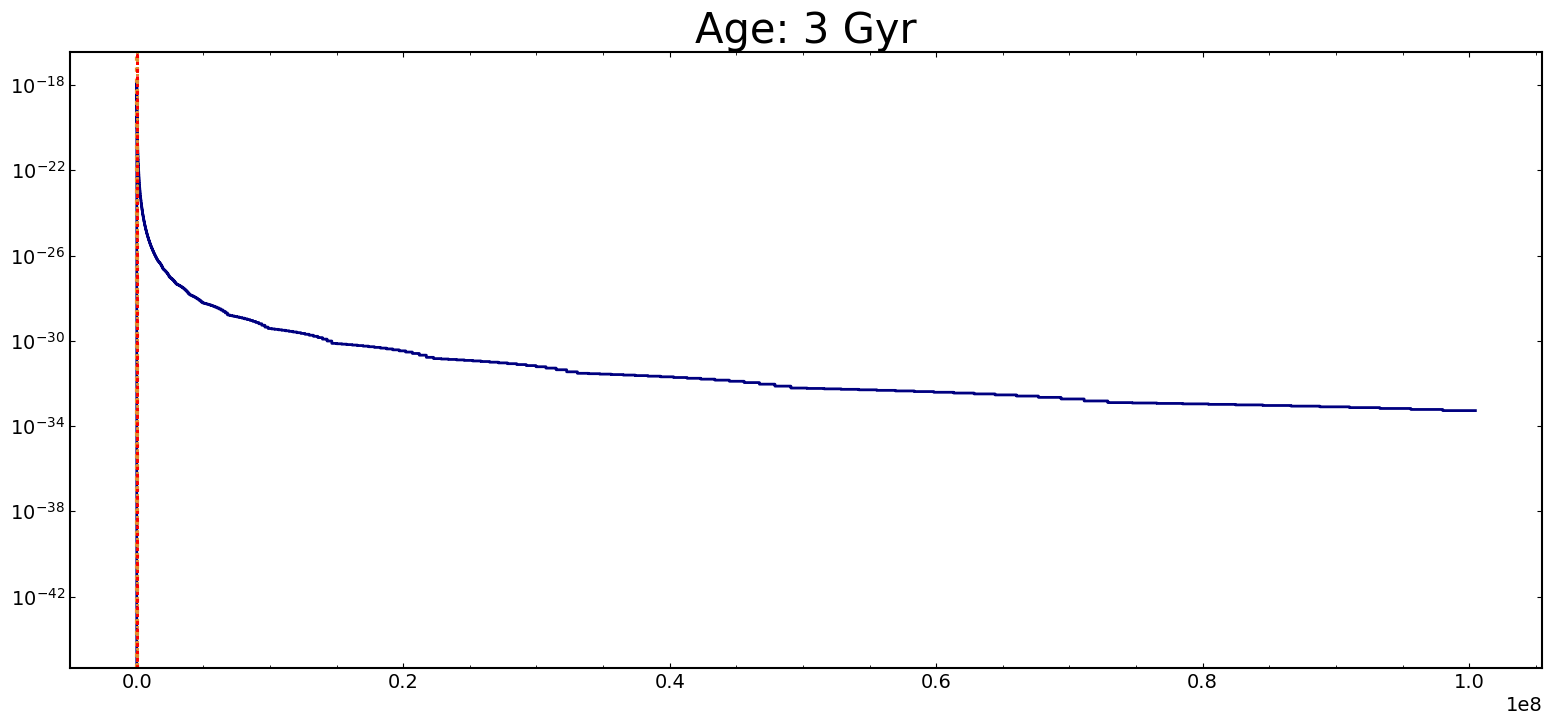

In [189]:
fig, ax = plt.subplots(1, sharex=True, figsize=(19,8))
#fig, ax = model.plot(show=False)
x = model.wavelengths 
y = model.spectrum_full * (1 + model_components['redshift'])
plt.step(x, y, label='Plot', drawstyle='default', color='navy')
plt.xscale('linear')
plt.yscale('log')

ax.minorticks_on()
ax.axvline(x=6563, color='#E08E2F',lw=3,ls=':')
ax.annotate('Halpha',(6563,10),xytext=(6563,10),color='black',rotation=90,clip_on=True)

#ax.set_xlabel('Angstrom (λ)', fontsize=22)
#ax.set_ylabel('Flux (10^38.0 erg s^-1 A^-1)', fontsize=22)

plt.title('Age: ' + str(exp["age"]) + ' Gyr', fontsize=30)

#label_size = 24
#matplotlib.rcParams['xtick.labelsize'] = label_size 
#matplotlib.rcParams['ytick.labelsize'] = label_size
#ax.tick_params(top=True, length=10,width=2)

# Emission/Absorption Labelling
lwave = [912,1026,1215.67,1240,1260,1296.3,1323.9,1302,1304,1335,\
         1343.354,1394,1403,1417.237,1427.85,1501.76,1527,1548,1550,1608,\
         1640,1671,1855,1863,1909,2326,2344,2374,2424,2587,\
         2600,2796,2799,3346,3426,3727,3798,3835,3889,3933,3968,\
         3970,4102,4304,4340,4861,4959,5007,5167,5173,5184,\
         5876,5889,5896,6548,6563,6583,6716,6730,6875,7040,\
         7680,8190,8520]
lname = ['Lylim','Lyb','Lya','NV','SiII','CIII/SiIII','CII/NIII','SiII/OI',' ','CII',\
         'OIV','SiIV',' ','SiIII','CIII','SV','SiII','CIV',' ','FeII', \
         'HeII','AlII','AlIII','.','CIII','CII','FeII','FeII','NeIV','FeII',\
         '.','MgII - absorp',' ','NeV','NeV','[OII] - emi','Htheta','Heta','Hzeta','K','H,Hepsilon',\
         ' ','Hdelta','Gb','Hgamma','Hbeta - absorp','[OIII]','[OIII]',' ','MgI',' ',\
         'HeI,NaD','.','.','NII','Halpha','.','SII','.','Bb','TiO',\
         'KI','Na','Cs']

lrun = len(lwave)
for i in range(lrun):
    tmpwl = lwave[i] * (1 + model_components['redshift'])
    ax.axvline(x=tmpwl, color='#E08E2F', lw=1, ls=':')
    ax.annotate(lname[i], (tmpwl,1e+38), xytext=(tmpwl-5,1e+38), color='#E08E2F', rotation=90, clip_on=True)

skylines = [5577, 5895, 6301, 6875, 7246, 7600]
    
for o in range(len(skylines)):
    ax.axvline(x=skylines[o], color='red', lw=2, ls=':')
    ax.annotate('Skyline', (skylines[o], 5000), xytext=(skylines[o],10),color='red',rotation=90,clip_on=True)

# Wavelength Bounds
#ax.set_xlim(np.min(x), np.max(x))
ax.set_xlim(np.min(model), np.max(model))

# Flux Bounds
ax.set_ylim(np.min(model), np.max(model))

plt.tight_layout()
plt.show()

fig.show()

YSCALE
37


/var/folders/qy/trts8c7d3dg4b7k01x7trmlw0000gn/T/ipykernel_37691/4274210073.py:9: RuntimeWarning: overflow encountered in scalar power
  spec_mask_av0 = ((redshifted_wavs_av0 > 10**xmin) & (redshifted_wavs_av0 < 10**xmax))
/var/folders/qy/trts8c7d3dg4b7k01x7trmlw0000gn/T/ipykernel_37691/4274210073.py:16: RuntimeWarning: overflow encountered in scalar power
  spec_mask_av2 = ((redshifted_wavs_av2 > 10**xmin) & (redshifted_wavs_av2 < 10**xmax))


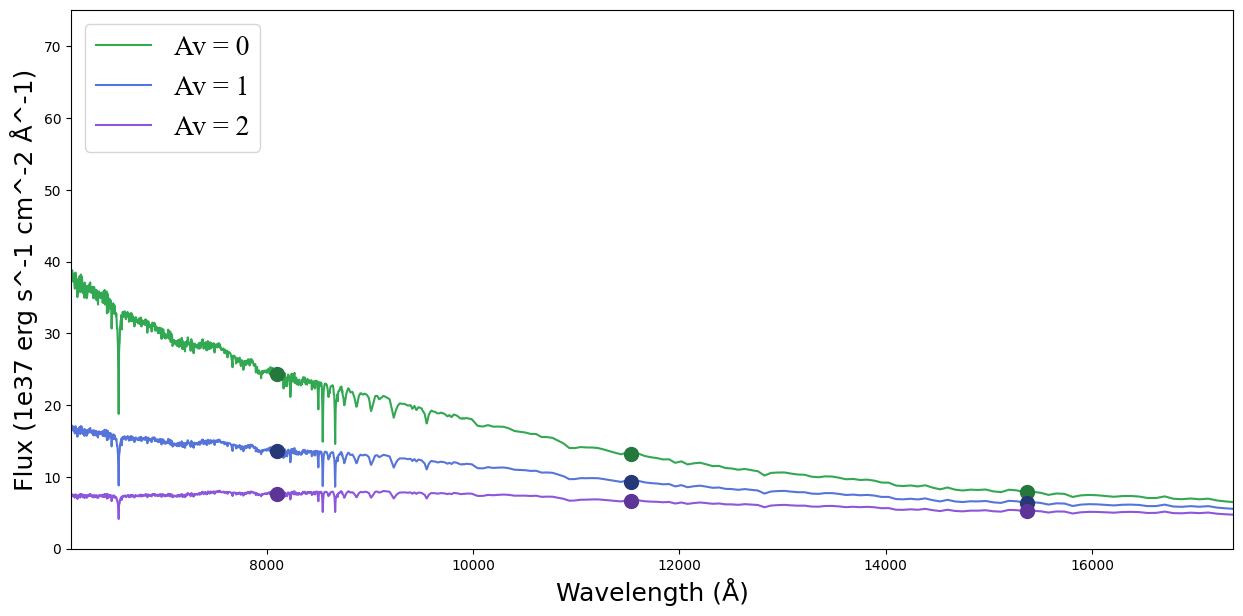

In [8]:
fig, ax = plt.subplots(figsize = (15,7))

# Sort out axis limits
xmin = model_av0.filter_set.eff_wavs.min()
xmax = model_av0.filter_set.eff_wavs.max()

####AV0
redshifted_wavs_av0 = model_av0.wavelengths*(1.+model_av0.model_comp["redshift"])
spec_mask_av0 = ((redshifted_wavs_av0 > 10**xmin) & (redshifted_wavs_av0 < 10**xmax))

####AV1
redshifted_wavs_av1 = model_av1.wavelengths*(1.+model_av1.model_comp["redshift"])

####AV2
redshifted_wavs_av2 = model_av2.wavelengths*(1.+model_av2.model_comp["redshift"])
spec_mask_av2 = ((redshifted_wavs_av2 > 10**xmin) & (redshifted_wavs_av2 < 10**xmax))

ymax = 1.05*np.max(model_av0.spectrum_full)
y_scale = int(np.log10(ymax))-1

print('YSCALE')
print(y_scale)

ax.set_xlim(xmin - 2000, xmax + 2000)
ax.set_ylim(0, ymax*10**-y_scale)

ax.get_xaxis().set_tick_params(which='minor', size=0)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xscale('linear')
plt.yscale('linear')

ax.set_xlabel('Wavelength (Å)', fontsize=18)
ax.set_ylabel('Flux (1e{} erg s^-1 cm^-2 Å^-1)'.format(y_scale), fontsize=18)

# Plot the data
Av0, = ax.plot(redshifted_wavs_av0,
        model_av0.spectrum_full*10**-y_scale, color='#32a852', 
        zorder = 1, label='Av = 0')
ax.scatter(model_av0.filter_set.eff_wavs,
           model_av0.photometry*10**-y_scale,
           color='#25783c', s=100, zorder = 1)

Av1, = ax.plot(redshifted_wavs_av1,
        model_av1.spectrum_full*10**-y_scale, color='#5675db',
        zorder = 1, label='Av = 1')
ax.scatter(model_av1.filter_set.eff_wavs,
           model_av1.photometry*10**-y_scale,
           color='#253878', s=100, zorder = 1)

Av2, = ax.plot(redshifted_wavs_av2,
        model_av2.spectrum_full*10**-y_scale, color='#8d56db',
        zorder = 1, label='Av = 2')
ax.scatter(model_av2.filter_set.eff_wavs,
           model_av2.photometry*10**-y_scale,
           color='#5d3596', s=100, zorder = 1)

ax.legend(handles=[Av0, Av1, Av2], loc='upper left', prop={'family': 'Times New Roman', 'size': '20'})

In [11]:
xmin = model_av0.filter_set.eff_wavs.min()
xmax = model_av0.filter_set.eff_wavs.max()

####AV0
redshifted_wavs_av0 = model_av0.wavelengths*(1.+model_av0.model_comp["redshift"])
spec_mask_av0 = ((redshifted_wavs_av0 > 10**xmin) & (redshifted_wavs_av0 < 10**xmax))

####AV1
redshifted_wavs_av1 = model_av1.wavelengths*(1.+model_av1.model_comp["redshift"])

####AV2
redshifted_wavs_av2 = model_av2.wavelengths*(1.+model_av2.model_comp["redshift"])
spec_mask_av2 = ((redshifted_wavs_av2 > 10**xmin) & (redshifted_wavs_av2 < 10**xmax))

ymax = 1.05*np.max(model_av0.spectrum_full)
y_scale = int(np.log10(ymax))-1

print('YSCALE')
print(y_scale)

ax.set_xlim(xmin - 2000, xmax + 2000)
ax.set_ylim(0, ymax*10**-y_scale)

ax.get_xaxis().set_tick_params(which='minor', size=0)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xscale('linear')
plt.yscale('linear')

ax.set_xlabel('Wavelength (Å)', fontsize=18)
ax.set_ylabel('Flux (1e{} erg s^-1 cm^-2 Å^-1)'.format(y_scale), fontsize=18)

# Plot the data
Av0, = ax.plot(redshifted_wavs_av0,
        model_av0.spectrum_full*10**-y_scale, color='#32a852', 
        zorder = 1, label='Av = 0')
ax.scatter(model_av0.filter_set.eff_wavs,
           model_av0.photometry*10**-y_scale,
           color='#25783c', s=100, zorder = 1)

Av1, = ax.plot(redshifted_wavs_av1,
        model_av1.spectrum_full*10**-y_scale, color='#5675db',
        zorder = 1, label='Av = 1')
ax.scatter(model_av1.filter_set.eff_wavs,
           model_av1.photometry*10**-y_scale,
           color='#253878', s=100, zorder = 1)

Av2, = ax.plot(redshifted_wavs_av2,
        model_av2.spectrum_full*10**-y_scale, color='#8d56db',
        zorder = 1, label='Av = 2')
ax.scatter(model_av2.filter_set.eff_wavs,
           model_av2.photometry*10**-y_scale,
           color='#5d3596', s=100, zorder = 1)

ax.legend(handles=[Av0, Av1, Av2], loc='upper left', prop={'family': 'Times New Roman', 'size': '20'})

NameError: name 'model_av0' is not defined

['JWST_NIRCam.F405N.dat', 'JWST_NIRCam.F277W.dat', 'JWST_NIRCam.F200W.dat', '.DS_Store', 'Icon\r', 'JWST_NIRCam.F115W.dat', 'JWST_NIRCam.F182M.dat', 'JWST_NIRCam.F360M.dat', 'JWST_NIRCam.F070W.dat', 'HST_ACS_HRC.F814W.dat', 'JWST_NIRCam.F212N.dat', 'JWST_NIRCam.F150W2.dat', 'JWST_NIRCam.F480M.dat', 'JWST_NIRCam.F300M.dat', 'JWST_NIRCam.F140M.dat', 'JWST_NIRCam.F250M.dat', 'JWST_NIRCam.F323N.dat', 'JWST_NIRCam.F460M.dat', 'HST_WFC3_IR.F110W.dat', 'JWST_NIRCam.F335M.dat', 'JWST_NIRCam.F162M.dat', 'JWST_NIRCam.F090W.dat', 'JWST_NIRCam.F356W.dat', 'JWST_NIRCam.F210M.dat', 'JWST_NIRCam.F466N.dat', 'JWST_NIRCam.F150W.dat', 'JWST_NIRCam.F322W2.dat', 'JWST_NIRCam.F470N.dat', 'JWST_NIRCam.F410M.dat', 'JWST_NIRCam.F164N.dat', 'HST_WFC3_IR.F160W.dat', 'JWST_NIRCam.F444W.dat', 'JWST_NIRCam.F187N.dat', 'JWST_NIRCam.F430M.dat']
JWST_NIRCam.F405N.dat
[39699.2, 39712.7, 39726.2, 39739.7, 39753.2, 39766.7, 39780.3, 39793.8, 39807.3, 39820.8, 39834.3, 39847.8, 39861.3, 39874.8, 39888.4, 39901.9, 39915.4

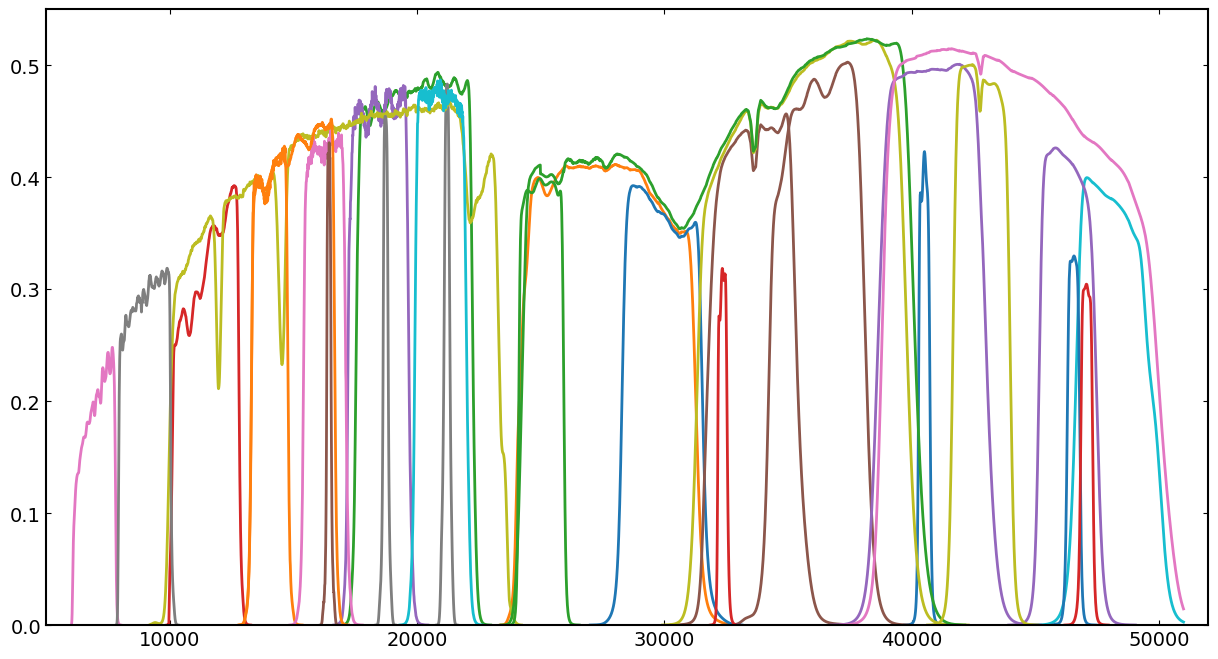

In [5]:
import bagpipes as pipes
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scienceplots as scipl
import math
import os

fig, ax = plt.subplots(figsize = (15,8))

print(os.listdir('filters/'))

colours={'JWST_NIRCam.F405N.dat': 'red', 'JWST_NIRCam.F277W.dat': 'blue', 'JWST_NIRCam.F200W.dat': 'pink', 'JWST_NIRCam.F115W.dat': 'purple', 'JWST_NIRCam.F182M.dat': 'cyan'}

for filename in os.listdir('filters/'):
    if 'JWST' in filename:
        print(filename)
        file = open('filters/'+filename, 'r')

        wavs = []
        through = []

        for line in file:
            pair = line.strip().split(' ')
            wavs.append(float(pair[0]))
            through.append(float(pair[1]))

        print(wavs)
        print(through)

        ax.plot(wavs, through)
        ax.set(xlim=(5000, 52000), ylim=(0, 0.55))

plt.show()

# Fix the colours
